# Goal 

This post aims to introduce k-means clustering using artificial data.
![image](https://user-images.githubusercontent.com/8764683/57978461-4386c480-79c3-11e9-8906-1bf26400efa1.png)



<!-- TEASER_END -->

# Libraries

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Create artificial clustered data

## Parameters

In [2]:
# 3 clusters in 2D
d_means = {'cluster 1': [0, 0], 
           'cluster 2': [4, 5], 
           'cluster 3': [5, 0]}
d_covs = {'cluster 1': [[1, 1], 
                        [1, 4]], 
          'cluster 2': [[1, 1], 
                        [1, 3]], 
          'cluster 3': [[4, 2], 
                        [2, 2]]}


## Ground Truth Data 

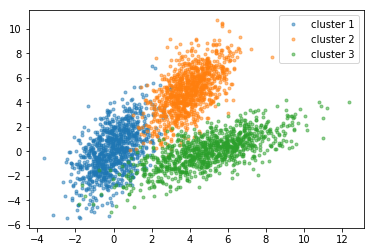

In [3]:
# Generate data based on the above parameters
df_data = pd.DataFrame(columns=['x', 'y'])
for i, (cluster, mean) in enumerate(d_means.items()):
    x, y = np.random.multivariate_normal(mean, d_covs[cluster], 1000).T
    df_data = df_data.append(pd.DataFrame({'x':x, 'y': y}))
    plt.plot(x, y, '.', label=cluster, alpha=0.5)
#     plt.axis('equal')
plt.legend()
plt.show()


## Observed Data

In [4]:
df_data.head()

,x,y
0,0.242205,-0.692402
1,-0.939536,-2.498377
2,1.554767,1.949266
3,0.460970,4.290747
4,1.235782,2.366659


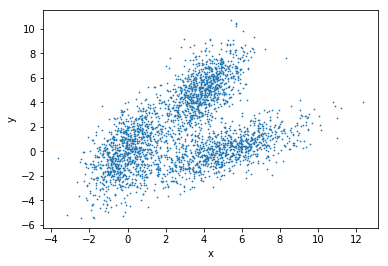

In [5]:
df_data.plot(kind='scatter', x='x', y='y', s=0.5);

# K-means clustering

In [6]:
cls = KMeans(init='k-means++', n_clusters=3, n_init=10)
cls.fit(df_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
df_data['predicted_label'] = cls.labels_.astype(int)

In [8]:
df_data.head(5)

,x,y,predicted_label
0,0.242205,-0.692402,0
1,-0.939536,-2.498377,0
2,1.554767,1.949266,0
3,0.460970,4.290747,1
4,1.235782,2.366659,0


## Check the predicted label by plot

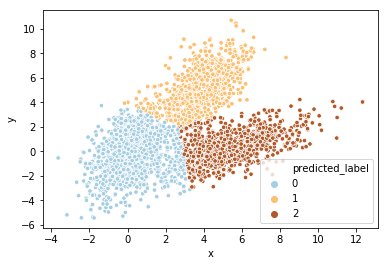

In [9]:
sns.scatterplot(x="x", y="y", hue="predicted_label", 
                data=df_data, palette='Paired', s=20);
plt.legend(loc='lower right');